<a href="https://colab.research.google.com/github/gabrieltomasin/CartolaFC-data-science/blob/main/enem_ribeirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Instalando pacotes e importando bibliotecas

In [1]:
!pip install -q gdown
!pip install -q scikit_posthocs

     |████████████████████████████████| 43 kB 886 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from scipy.stats import kruskal

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Abrindo DataFrame

In [3]:
# Baixando arquivo 'dados_ribeirao_com_competencias.csv'
!gdown https://drive.google.com/uc?id=1KvHu5hiFU_SKOFEsSE4c8rexLrjhq9aS

Downloading...
From: https://drive.google.com/uc?id=1KvHu5hiFU_SKOFEsSE4c8rexLrjhq9aS
To: /content/dados_ribeirao_com_competencias.csv
100% 3.02M/3.02M [00:00<00:00, 219MB/s]


In [4]:
dados = pd.read_csv('/content/dados_ribeirao_com_competencias.csv')

# Análises

Usando o método ```.melt()``` para que o formato seja plotável.
As competências são divididas nas colunas 'competencia' e 'n_acertos'

In [5]:
melted = dados[['Q006','TP_DEPENDENCIA_ADM_ESC','Q002', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8']].melt(id_vars=["Q006","TP_DEPENDENCIA_ADM_ESC","Q002"], var_name="competencia", value_name='n_acertos')

## Análise 1: Acertos nas competências de acordo com a renda

### Considerando faixa de renda como  uma variável  categórica

#### Testes estatísticos com a Competência 1

##### ANOVA

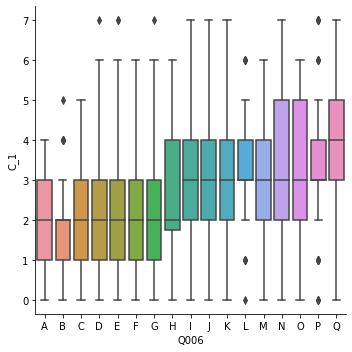

In [6]:
sns.catplot(data=dados, x='Q006', y='C_1', kind='box', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

H<sup>0</sup> - As médias de acertos na competência 1 são iguais entre os grupos de renda

H<sup>1</sup> - As médias de acertos na competência 1 não são iguais entre os grupos de renda

In [7]:
mod = ols('C_1 ~ Q006', data=dados).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

              df       sum_sq    mean_sq          F        PR(>F)
Q006        16.0  1064.924587  66.557787  34.450316  6.212330e-98
Residual  3078.0  5946.676059   1.931994        NaN           NaN


Rejeita-se a hipótese nula (p < 0.05). As médias de número de acertos na competência 1 varia significativamente entre os grupos de renda.

<h4>Faremos o teste Tukey para ver quais pares de grupos de renda apresentam diferenças significativas na média do número de acertos:</h4>

In [8]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_1",'Q006')
relationship_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
A,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.753185,0.325329,0.640615,0.018051,0.718578,0.005467,0.003877,0.004453,0.001000
B,0.900000,1.000000,0.884409,0.145221,0.087502,0.017079,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
C,0.900000,0.884409,1.000000,0.874277,0.688653,0.226545,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
D,0.900000,0.145221,0.874277,1.000000,0.900000,0.900000,0.699196,0.065099,0.001000,0.001000,0.004207,0.001000,0.024027,0.001000,0.001000,0.001000,0.001000
E,0.900000,0.087502,0.688653,0.900000,1.000000,0.900000,0.619183,0.037575,0.001000,0.001000,0.002843,0.001000,0.019142,0.001000,0.001000,0.001000,0.001000
F,0.900000,0.017079,0.226545,0.900000,0.900000,1.000000,0.900000,0.757022,0.051510,0.001000,0.104299,0.001000,0.264016,0.001000,0.001000,0.001000,0.001000
G,0.900000,0.001000,0.001000,0.699196,0.619183,0.900000,1.000000,0.900000,0.189185,0.003895,0.295344,0.001000,0.552432,0.001000,0.001000,0.001000,0.001000
H,0.900000,0.001000,0.001000,0.065099,0.037575,0.757022,0.900000,1.000000,0.900000,0.294871,0.900000,0.001096,0.900000,0.001000,0.001000,0.001000,0.001000
I,0.753185,0.001000,0.001000,0.001000,0.001000,0.051510,0.189185,0.900000,1.000000,0.900000,0.900000,0.058542,0.900000,0.001455,0.001000,0.001592,0.001000
J,0.325329,0.001000,0.001000,0.001000,0.001000,0.001000,0.003895,0.294871,0.900000,1.000000,0.900000,0.820599,0.900000,0.426448,0.308224,0.370406,0.001000


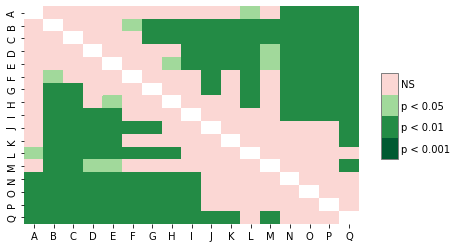

In [9]:
x = sp.sign_plot(relationship_df)

O gráfico demonstra que aparentemente, os pares de grupos com maior discrepância na renda apresentam diferenças significativas no número de acertos, enquanto grupos cuja renda é mais próxima não.

In [10]:
dados.groupby('Q006')['C_1'].describe()

,count,mean,std,min,25%,50%,75%,max
Q006,,,,,,,,
A,17.0,2.000000,1.274755,0.0,1.00,2.0,3.0,4.0
B,110.0,1.654545,1.104091,0.0,1.00,2.0,2.0,5.0
C,469.0,1.936034,1.259223,0.0,1.00,2.0,3.0,5.0
D,297.0,2.134680,1.266263,0.0,1.00,2.0,3.0,7.0
E,421.0,2.142518,1.325078,0.0,1.00,2.0,3.0,7.0
F,215.0,2.269767,1.367776,0.0,1.00,2.0,3.0,6.0
G,358.0,2.374302,1.419989,0.0,1.00,2.0,3.0,7.0
H,228.0,2.548246,1.383460,0.0,1.75,2.0,4.0,6.0
I,198.0,2.742424,1.463366,0.0,2.00,3.0,4.0,7.0


Aparentemente, há diferenças significativas nos grupos, no que se refere ao n-amostral e à variância, é prudente realizar o teste não paramétrico Kruskal-Wallis

##### Kruskal-Wallis

H<sup>0</sup> - As médias de acertos na competência 1 são iguais entre os grupos de renda

H<sup>1</sup> - As médias de acertos na competência 1 não são iguais entre os grupos de renda

In [11]:
categories = []
for i in sorted(dados['Q006'].unique()):
    categories.append(dados[dados['Q006'] == i]['C_1'])

In [12]:
kruskal(*categories)

KruskalResult(statistic=431.5355718336719, pvalue=8.769421746464562e-82)

O teste Kruskal-Wallis demonstrou que existem diferenças significativas no número de acertos entre as categorias, portanto rejeita-se a hipótese nula.

<h4>Faremos um teste post hoc de Dunn para verificar em quais pares grupos de renda há diferenças significativas na média do número de acertos</h4>

In [13]:
relationship_df = sp.posthoc_dunn(dados, 'C_1', 'Q006', 'holm')
relationship_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
A,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.316736e-01,1.000000,2.955834e-02,1.000000,3.429184e-02,2.191262e-02,1.955597e-02,2.623856e-04
B,1.000000,1.000000e+00,1.000000e+00,1.375244e-01,6.931069e-02,1.293468e-02,2.516130e-04,4.472579e-06,3.229609e-08,8.784367e-10,0.000001,8.594766e-13,0.000024,9.986297e-16,8.556856e-17,8.001683e-16,3.198806e-29
C,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.226302e-01,2.784067e-03,2.632577e-05,4.652663e-08,3.105034e-09,0.000027,6.293724e-12,0.000772,1.472617e-16,5.061907e-18,3.191075e-16,7.255020e-38
D,1.000000,1.375244e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.418228e-02,7.251544e-04,1.865541e-05,0.006204,1.618097e-08,0.050164,2.654494e-11,2.077994e-12,2.218363e-11,5.946415e-27
E,1.000000,6.931069e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.483845e-02,3.067517e-04,8.474751e-06,0.004816,8.034925e-09,0.045222,5.226224e-12,3.264454e-13,5.340877e-12,1.724228e-29
F,1.000000,1.293468e-02,4.226302e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.066527e-01,3.519912e-03,0.153130,3.608972e-06,0.584390,7.600309e-08,1.055400e-08,4.022894e-08,1.013630e-19
G,1.000000,2.516130e-04,2.784067e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.094423e-01,1.341130e-02,0.476036,1.402735e-05,1.000000,2.422218e-07,3.043237e-08,1.339902e-07,1.856918e-20
H,1.000000,4.472579e-06,2.632577e-05,5.418228e-02,3.483845e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.475680e-01,1.000000,2.410932e-03,1.000000,4.143841e-04,9.900524e-05,1.798386e-04,4.542235e-13
I,1.000000,3.229609e-08,4.652663e-08,7.251544e-04,3.067517e-04,1.066527e-01,4.094423e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,5.692132e-02,1.000000,2.955834e-02,1.030891e-02,1.255583e-02,5.109203e-09
J,0.631674,8.784367e-10,3.105034e-09,1.865541e-05,8.474751e-06,3.519912e-03,1.341130e-02,7.475680e-01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,7.083315e-04


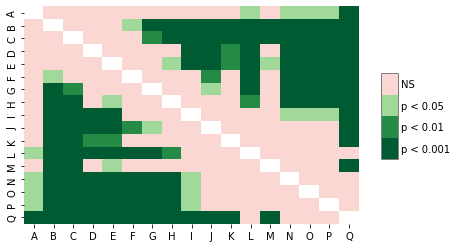

In [14]:
x = sp.sign_plot(relationship_df)

Encontramos resultados similares aos gerados pelo teste de Tukey: aparentemente, os pares de grupos com maior discrepância na renda apresentam diferenças significativas no número de acertos, enquanto grupos cuja renda é mais próxima não.

#### Testes estatísticos em todas as competências

In [15]:
comp_list = ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8']

##### ANOVA

H<sup>0</sup> - As médias de acertos na competência 1 são iguais entre os grupos de renda

H<sup>1</sup> - As médias de acertos na competência 1 não são iguais entre os grupos de renda

In [16]:
for comp in comp_list:
    mod = ols('{} ~ Q006'.format(comp), data=dados).fit()
    anova_table = sm.stats.anova_lm(mod, typ=1)
    print('COMPETÊNCIA {}\n'.format(comp[-1]),anova_table,'\n')

COMPETÊNCIA 1
               df       sum_sq    mean_sq          F        PR(>F)
Q006        16.0  1064.924587  66.557787  34.450316  6.212330e-98
Residual  3078.0  5946.676059   1.931994        NaN           NaN 

COMPETÊNCIA 2
               df       sum_sq   mean_sq         F        PR(>F)
Q006        16.0   131.780510  8.236282  7.496024  1.374895e-17
Residual  3078.0  3381.962947  1.098753       NaN           NaN 

COMPETÊNCIA 3
               df       sum_sq    mean_sq          F        PR(>F)
Q006        16.0   980.776926  61.298558  31.518666  1.812941e-89
Residual  3078.0  5986.197549   1.944834        NaN           NaN 

COMPETÊNCIA 4
               df       sum_sq    mean_sq          F        PR(>F)
Q006        16.0   216.431637  13.526977  16.491306  8.883877e-45
Residual  3078.0  2524.726360   0.820249        NaN           NaN 

COMPETÊNCIA 5
               df       sum_sq   mean_sq         F        PR(>F)
Q006        16.0    58.807634  3.675477  4.502689  5.725670e-09
Res

Todas as competências apresentam médias no número de acertos significantemente diferentes entre as faixas de renda (p < 0.05)

<h3>Faremos o teste Tukey para ver quais pares de grupos de renda apresentam diferenças significativas na média do número de acertos:</h3>

Competência 1:

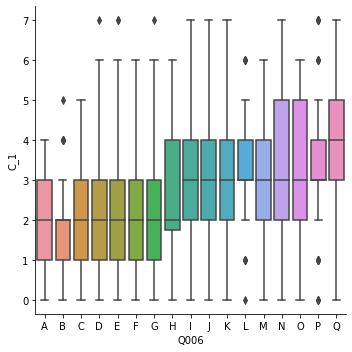

In [17]:
sns.catplot(data=dados, x='Q006', y='C_1', kind='box', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

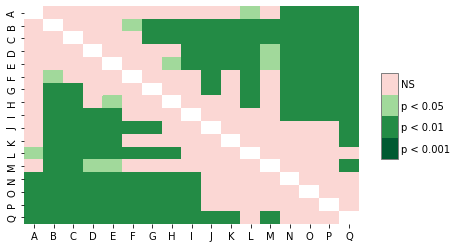

In [18]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_1",'Q006')
x = sp.sign_plot(relationship_df)

Competência 2:

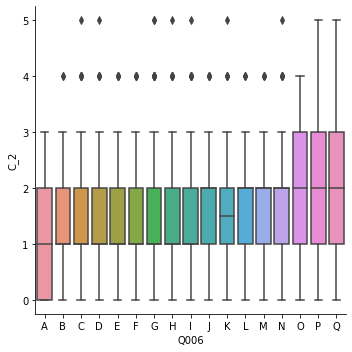

In [19]:
sns.catplot(data=dados, x='Q006', y='C_2', kind='box', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

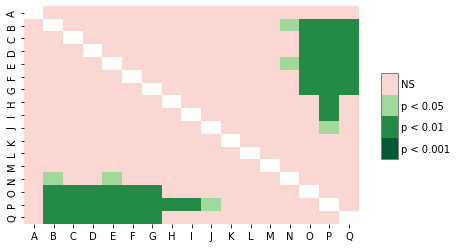

In [20]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_2",'Q006')
x = sp.sign_plot(relationship_df)

Competência 3:

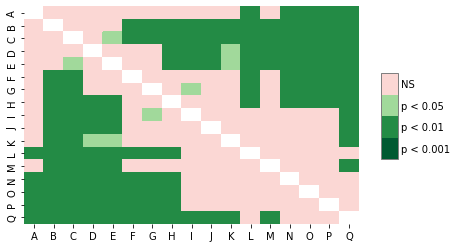

In [21]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_3",'Q006')
x = sp.sign_plot(relationship_df)

Competência 4:

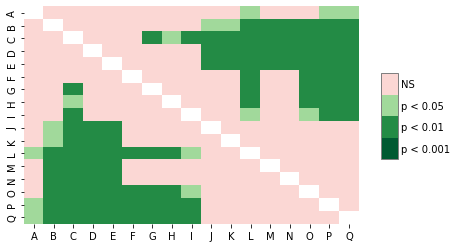

In [22]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_4",'Q006')
x = sp.sign_plot(relationship_df)

Competência 5:

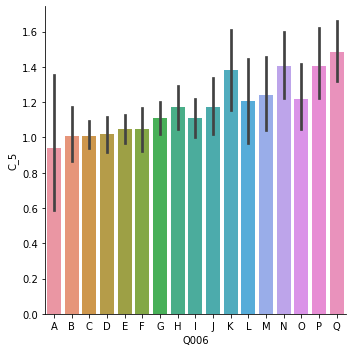

In [23]:
sns.catplot(data=dados, x='Q006', y='C_5', kind='bar', ci=95, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

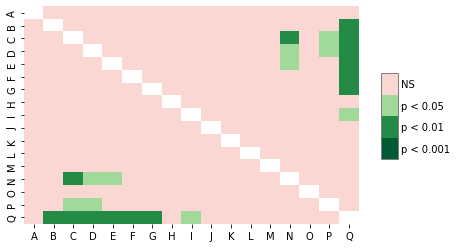

In [24]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_5",'Q006')
x = sp.sign_plot(relationship_df)

Competência 6:

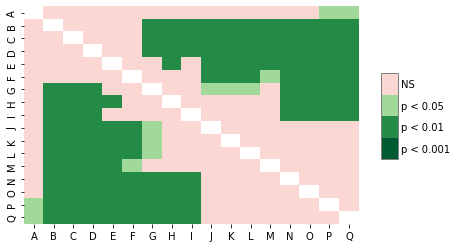

In [25]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_6",'Q006')
x = sp.sign_plot(relationship_df)

Competência 7:

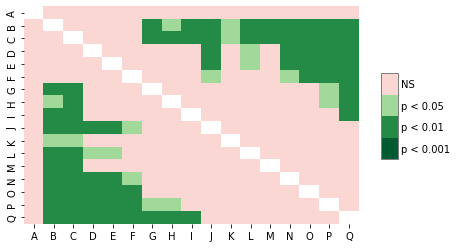

In [26]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_7",'Q006')
x = sp.sign_plot(relationship_df)

Competência 8:

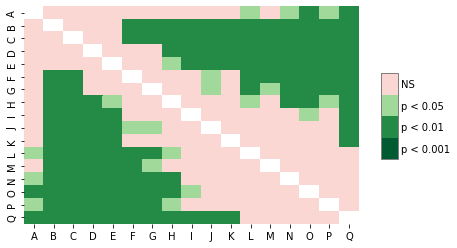

In [27]:
relationship_df = sp.posthoc_tukey(dados.sort_values('Q006'),"C_8",'Q006')
x = sp.sign_plot(relationship_df)

Os gráficos parecem seguir o mesmo padrão, a média do número de acertos em determinada competência tem diferenças significativas entre faixas de renda mais distintas. Nas competências 2 e 5 esta relação não é tão clara

##### Kruskal-Wallis

H<sup>0</sup> - As médias de acertos na competência 1 são iguais entre os grupos de renda

H<sup>1</sup> - As médias de acertos na competência 1 não são iguais entre os grupos de renda

In [28]:
#Guardar as listas de series de cada competência em um dicionário. Cada par no dict equivale a uma competência e cada series dentro da lista
#é uma faixa de renda
categories_dict = {}
for comp in comp_list:
    categories_dict[comp] = []
    for i in sorted(dados['Q006'].unique()):
        categories_dict[comp].append(dados[dados['Q006'] == i]['{}'.format(comp)])

In [29]:
#Realizar o teste Kruskal-Wallis para cada competência
krusk_results = []
for k in categories_dict:
    krusk_results.append(kruskal(*categories_dict[k]))

In [30]:
for i in krusk_results:
    print('\nCOMPETÊNCIA {}\n'.format(krusk_results.index(i) + 1), i)


COMPETÊNCIA 1
 KruskalResult(statistic=431.5355718336719, pvalue=8.769421746464562e-82)

COMPETÊNCIA 2
 KruskalResult(statistic=106.98021296283197, pvalue=1.6772530720046392e-15)

COMPETÊNCIA 3
 KruskalResult(statistic=423.56882388351204, pvalue=4.135721400033122e-80)

COMPETÊNCIA 4
 KruskalResult(statistic=232.35497469633552, pvalue=2.113101611655986e-40)

COMPETÊNCIA 5
 KruskalResult(statistic=58.935810640444984, pvalue=7.900503111988677e-07)

COMPETÊNCIA 6
 KruskalResult(statistic=336.09607123032134, pvalue=8.158893866026465e-62)

COMPETÊNCIA 7
 KruskalResult(statistic=177.28361822374632, pvalue=2.94898761587482e-29)

COMPETÊNCIA 8
 KruskalResult(statistic=417.38316080584127, pvalue=8.227073147243882e-79)


Todas as competências apresentam médias no número de acertos significantemente diferentes entre as faixas de renda (p < 0.05)

<h4>Faremos testes post hoc de Dunn para verificar em quais pares grupos de renda há diferenças significativas na média do número de acertos</h4>

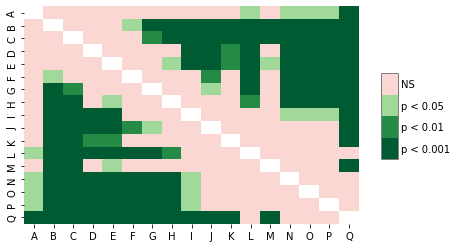

In [31]:
relationship_df = sp.posthoc_dunn(dados, 'C_1', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

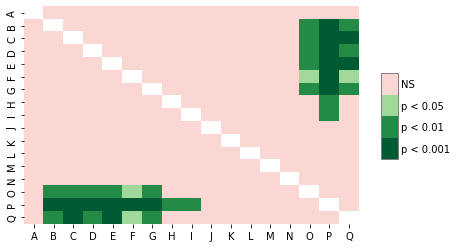

In [32]:
relationship_df = sp.posthoc_dunn(dados, 'C_2', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

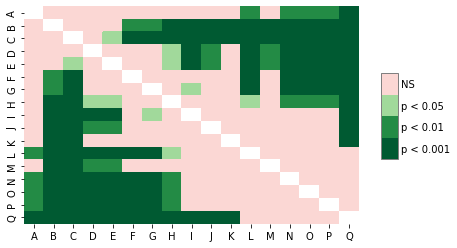

In [33]:
relationship_df = sp.posthoc_dunn(dados, 'C_3', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

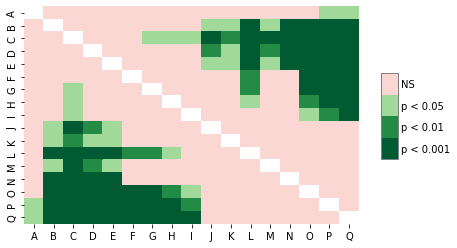

In [34]:
relationship_df = sp.posthoc_dunn(dados, 'C_4', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

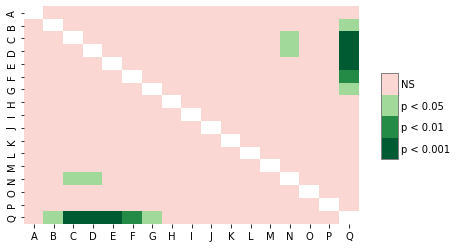

In [35]:
relationship_df = sp.posthoc_dunn(dados, 'C_5', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

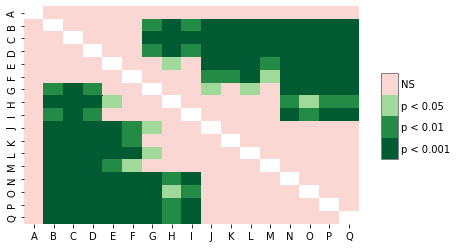

In [36]:
relationship_df = sp.posthoc_dunn(dados, 'C_6', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

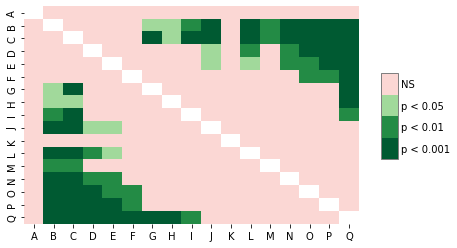

In [37]:
relationship_df = sp.posthoc_dunn(dados, 'C_7', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

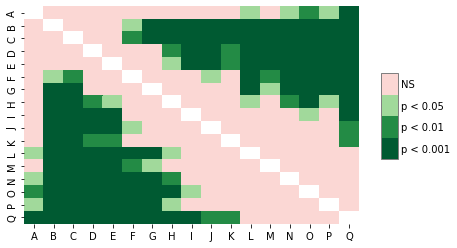

In [38]:
relationship_df = sp.posthoc_dunn(dados, 'C_8', 'Q006', 'holm')
x = sp.sign_plot(relationship_df)

Os gráficos parecem seguir o mesmo padrão, a média do número de acertos em determinada competência tem diferenças significativas entre faixas de renda mais distintas. Nas competências 2 e 5 esta relação não é tão clara

### Considerando faixa de renda como uma variável numérica

Traduzindo dados de renda para valores numéricos:

In [39]:
sorted(melted['Q006'].unique())

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q']

In [40]:
traducao = {
    'A': 0.0,
    'B': 998.0,
    'C': 1497.0,
    'D': 1996.0,
    'E': 2495.0,
    'F': 2994.0,
    'G': 3992.0,
    'H': 4990.0,
    'I': 5988.0,
    'J': 6986.0,
    'K': 7984.0,
    'L': 8982.0,
    'M': 9980.0,
    'N': 11976.0,
    'O': 14970.0,
    'P': 19960.0,
    'Q': 24950.0
}

> Escolhi os valores máximos de cada faixa de renda para representá-las numericamente e defini arbitrariamente o valor 24950 como máximo da categoria 'Q', respeitando o intervalo entre as categorias 'O' e 'P'.Futuramente pode ser interessante utilizar valores aleatórios respeitando os limites das categoriasde renda e estimar um valor máximo para a categoria 'Q' a partir do desvio do restante dos scores.

In [41]:
melted['Q006'] = melted['Q006'].map(traducao)

In [42]:
melted['Q006']

0         2994.0
1         3992.0
2         1497.0
3         5988.0
4        14970.0
          ...   
24755     1497.0
24756     2495.0
24757     2994.0
24758     1996.0
24759     4990.0
Name: Q006, Length: 24760, dtype: float64

Tamanho dos grupos:

In [43]:
melted.groupby('Q006').size().rename_axis('Renda')

Renda
0.0         136
998.0       880
1497.0     3752
1996.0     2376
2495.0     3368
2994.0     1720
3992.0     2864
4990.0     1824
5988.0     1584
6986.0      928
7984.0      672
8982.0      504
9980.0      560
11976.0     832
14970.0     848
19960.0     712
24950.0    1200
dtype: int64

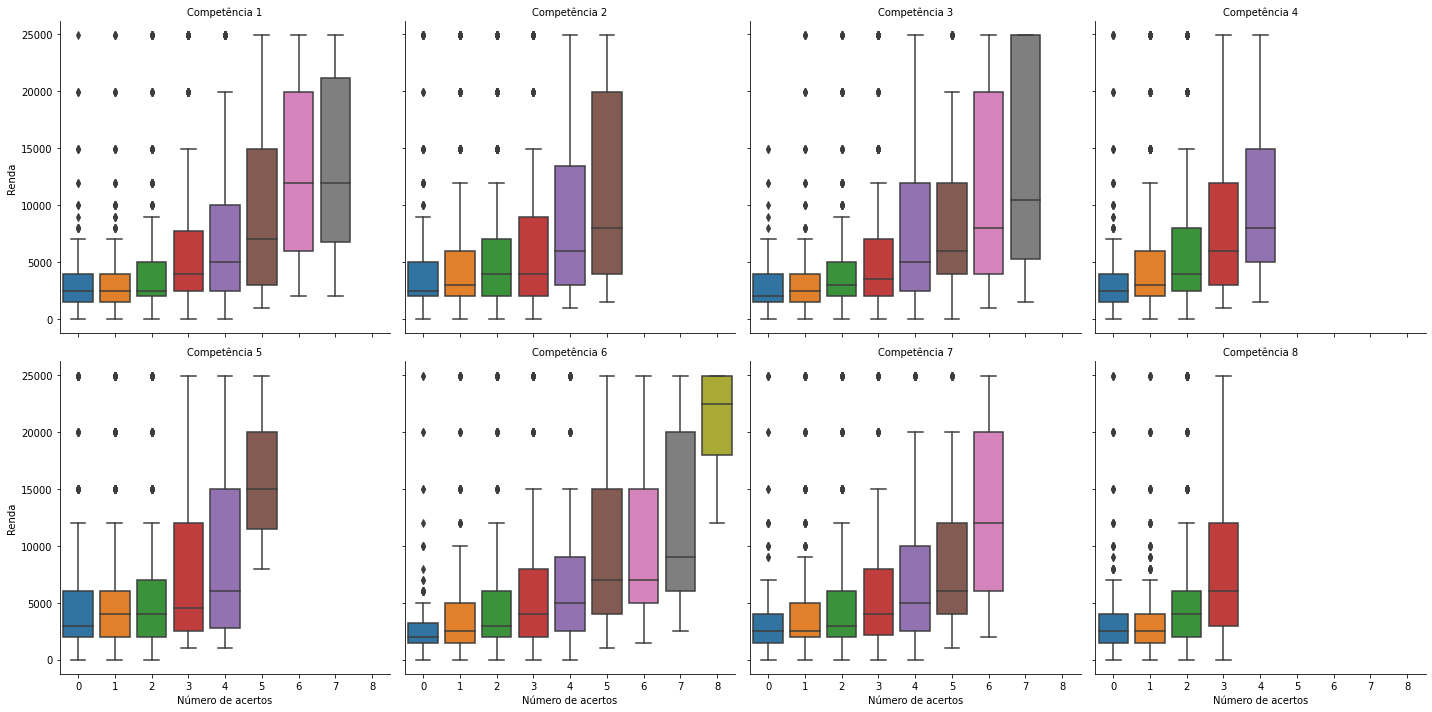

In [44]:
g = sns.catplot(data=melted, x='n_acertos', y='Q006', col='competencia', kind='box', col_wrap=4)
g.set_xlabels("Número de acertos")
g.set_ylabels('Renda')
g.set_titles(col_template= 'Competência {col_name[2]}')

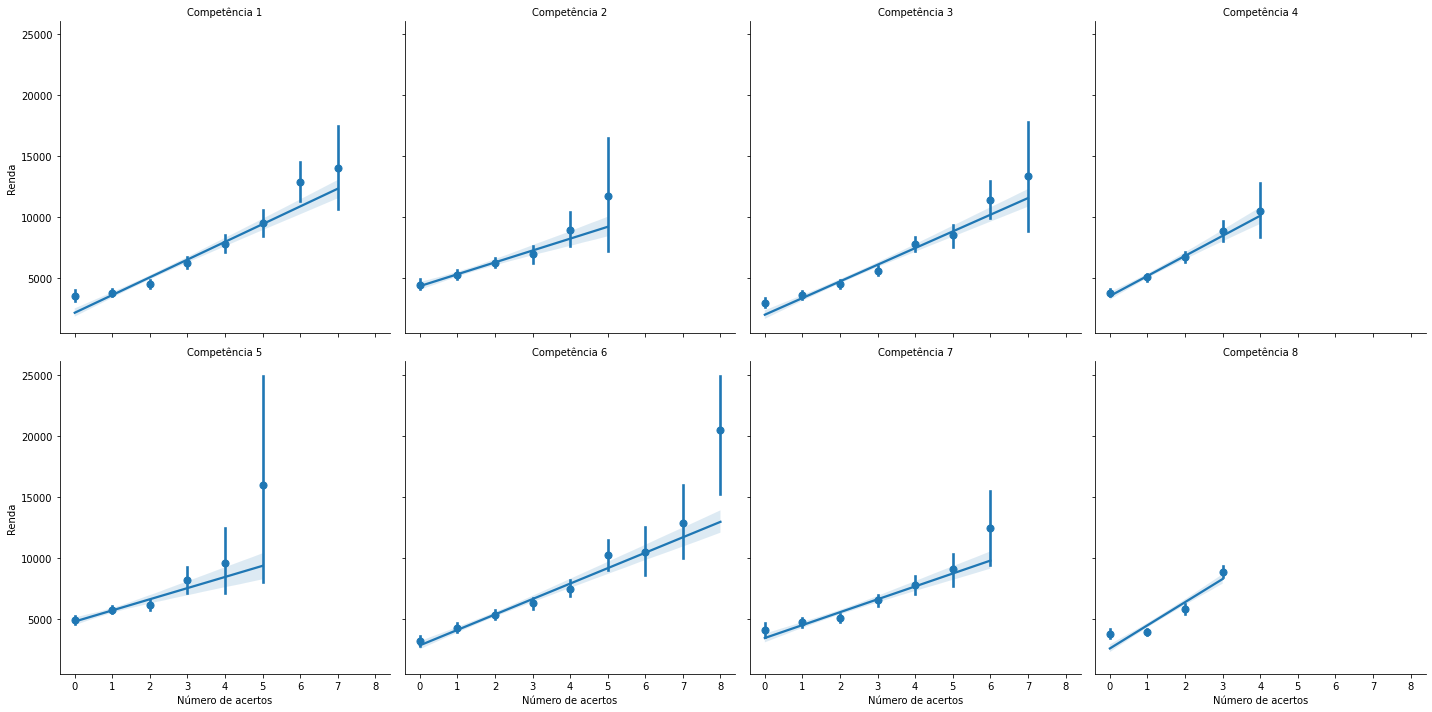

In [45]:
g = sns.lmplot(data=melted, x='n_acertos', y='Q006', col='competencia', col_wrap=4, x_estimator=np.mean)
g.set_xlabels("Número de acertos")
g.set_ylabels('Renda')
g.set_titles(col_template= 'Competência {col_name[2]}')

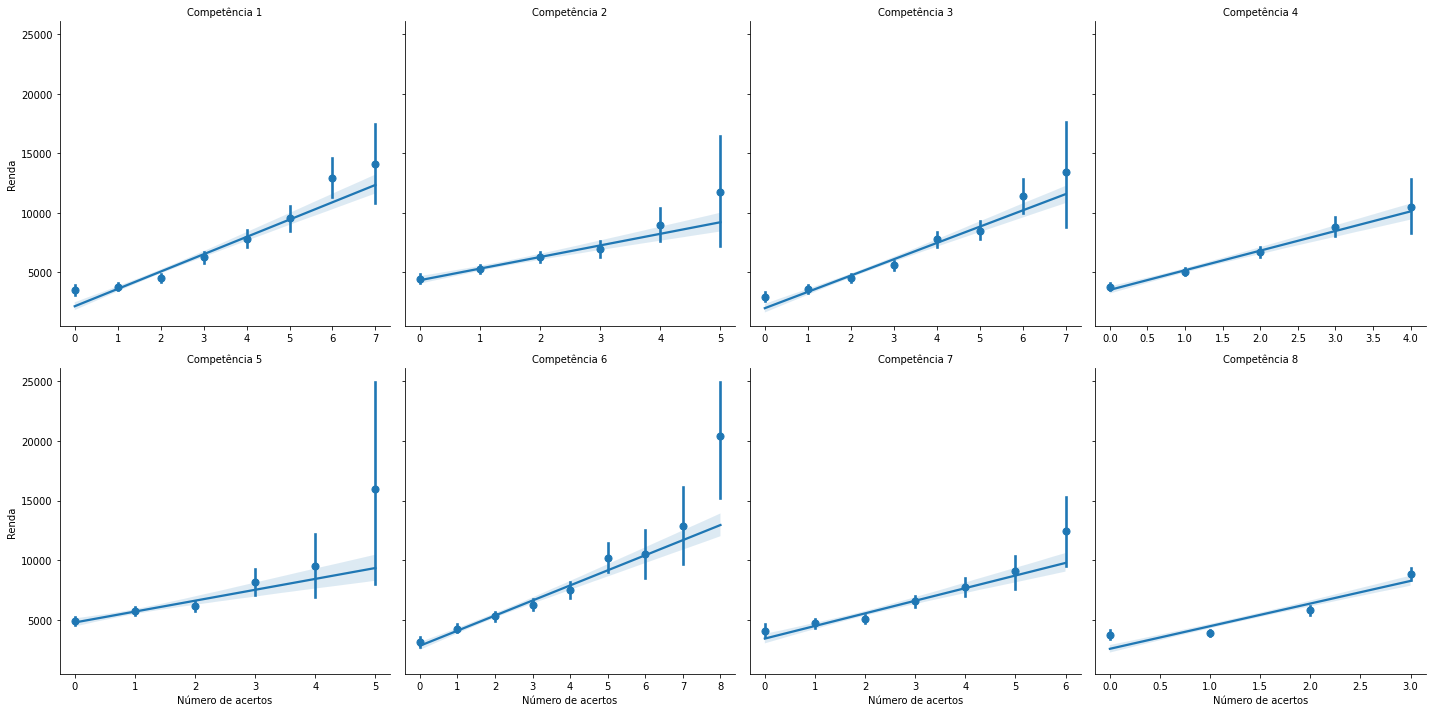

In [46]:
g = sns.lmplot(data=melted, x='n_acertos', y='Q006', col='competencia', col_wrap=4, x_estimator=np.mean, facet_kws= {'sharex' :False})
g.set_xlabels("Número de acertos")
g.set_ylabels('Renda')
g.set_titles(col_template= 'Competência {col_name[2]}')

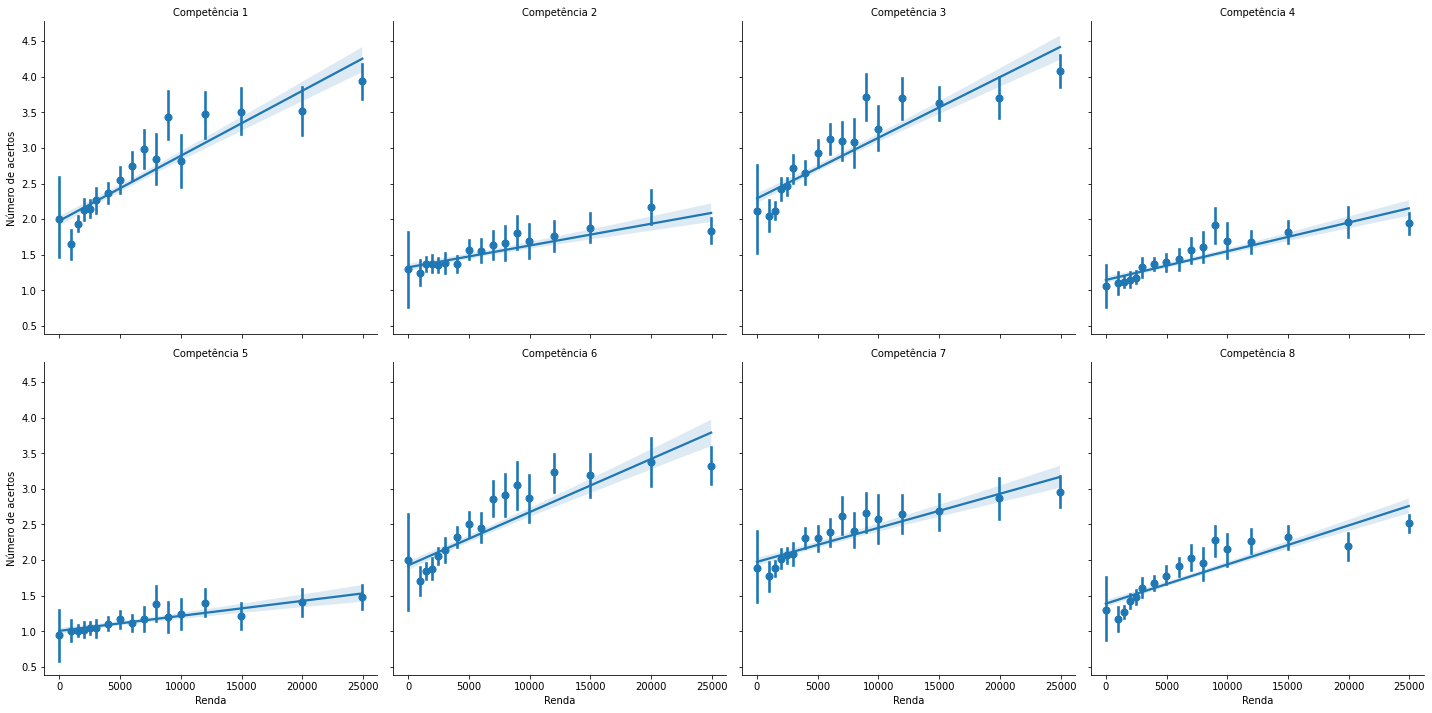

In [47]:
g = sns.lmplot(data=melted, y='n_acertos', x='Q006', col='competencia', col_wrap=4, x_estimator=np.mean)
g.set_ylabels("Número de acertos")
g.set_xlabels('Renda')
g.set_titles(col_template= 'Competência {col_name[2]}')

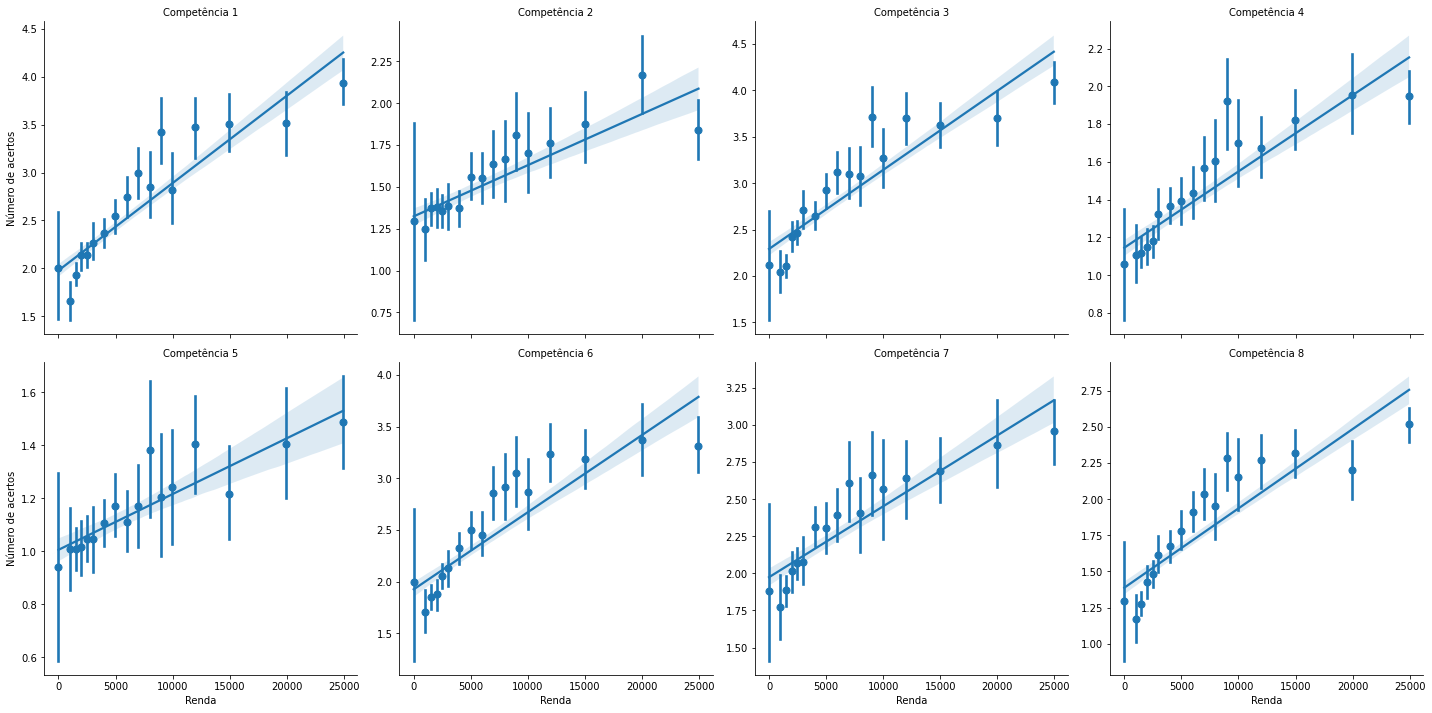

In [48]:
g = sns.lmplot(data=melted, y='n_acertos', x='Q006', col='competencia', col_wrap=4, x_estimator=np.mean, facet_kws= {'sharey' :False})
g.set_ylabels("Número de acertos")
g.set_xlabels('Renda')
g.set_titles(col_template= 'Competência {col_name[2]}')

## Análise 2: Acertos nas competências de acordo com a dependência admnistrativa da escola

In [49]:
melted = dados[['Q006','TP_DEPENDENCIA_ADM_ESC','Q002', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8']].melt(id_vars=["Q006","TP_DEPENDENCIA_ADM_ESC","Q002"], var_name="competencia", value_name='n_acertos')
melted = melted.sort_values(by=['Q002', 'competencia'])

Tamanho dos grupos:

In [50]:
melted.groupby('TP_DEPENDENCIA_ADM_ESC').size().rename(index={2:'Estadual', 4:'Particular'}).rename_axis('Dependência Admnistrativa')

Dependência Admnistrativa
Estadual      13552
Particular    11208
dtype: int64

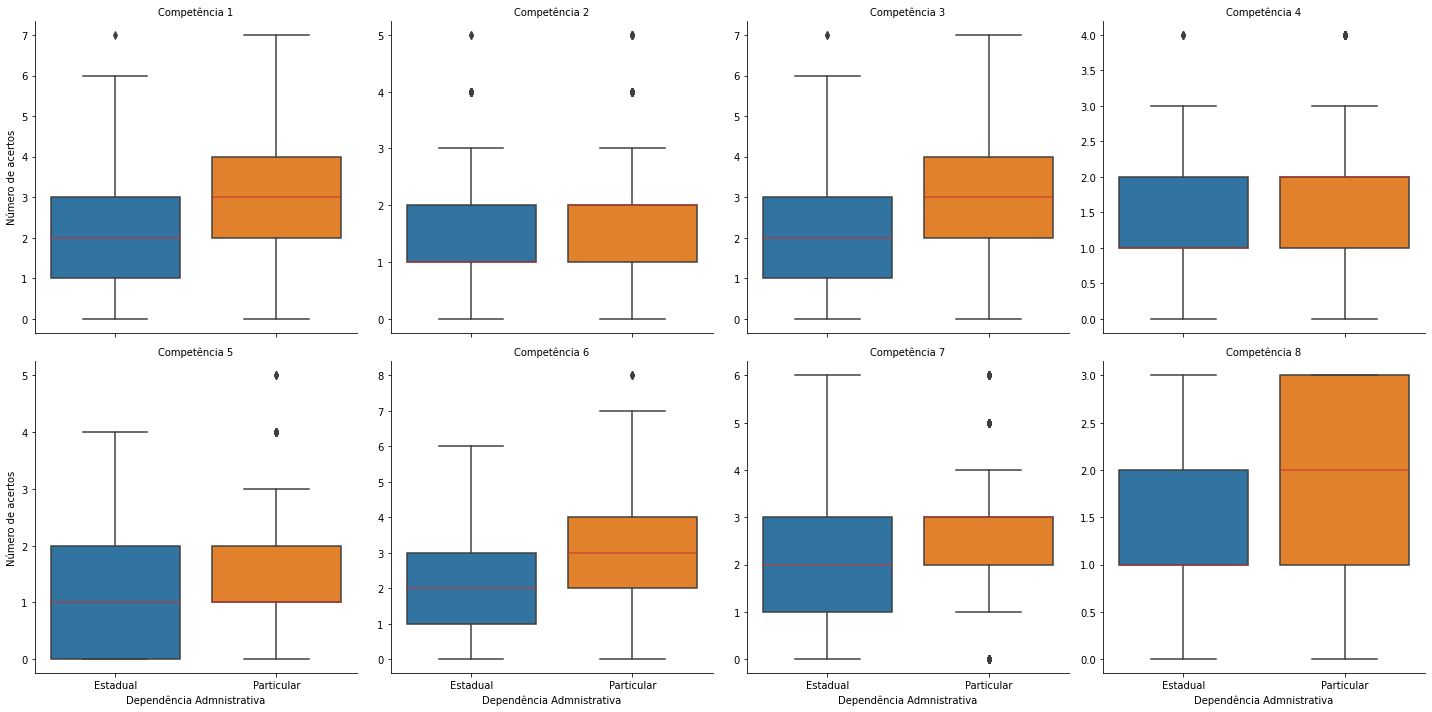

In [51]:
g = sns.catplot(data=melted, y='n_acertos', x='TP_DEPENDENCIA_ADM_ESC', col='competencia', kind='box', col_wrap=4, sharey=False, medianprops=dict(color="#c73434", alpha=0.7))
g.set_ylabels("Número de acertos")
g.set_xlabels('Dependência Admnistrativa')
g.set_xticklabels(['Estadual', 'Particular'])
g.set_titles(col_template= 'Competência {col_name[2]}')

Testar a normalidade da distribuição do número de acertos em cada competência para os grupos (Estadual / Particular)

In [52]:
from scipy import stats

In [53]:
for comp in comp_list:
    estadual = dados[dados['TP_DEPENDENCIA_ADM_ESC'] == 2]['{}'.format(comp)]
    particular = dados[dados['TP_DEPENDENCIA_ADM_ESC'] == 4]['{}'.format(comp)]

    print('Competência {}'.format(comp[-1]))
    if stats.normaltest(estadual)[1] > 0.05: print("A distribuição É normal para o grupo de escola estadual")
    else: print("A distribuição NÃO é normal para o grupo de escola estadual")
    if stats.normaltest(particular)[1] > 0.05: print("A distribuição É normal para o grupo de escola particular")
    else: print("A distribuição NÃO é normal para o grupo de escola particular")
    print('\n')


Competência 1
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 2
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 3
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 4
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 5
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 6
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 7
A distribuição NÃO é normal para o grupo de escola estadual
A distribuição NÃO é normal para o grupo de escola particular


Competência 8
A distribuição NÃO é

Como as distribuições não são normais, não é possível realizar o teste-t de grupos independentes. Utilizaremos o teste Mann-Whitney

In [54]:
for comp in comp_list:
    estadual = dados[dados['TP_DEPENDENCIA_ADM_ESC'] == 2]['{}'.format(comp)]
    particular = dados[dados['TP_DEPENDENCIA_ADM_ESC'] == 4]['{}'.format(comp)]

    U, p = stats.mannwhitneyu(estadual, particular, alternative='less')

    print('Competência {}\nU= {}   p={}'.format(comp[-1],U,p),
          '\nMediana Estadual = {}'.format(estadual.median()),
          '\nMediana Particular = {}\n'.format(particular.median()))

Competência 1
U= 678619.5   p=6.743329083524385e-98 
Mediana Estadual = 2.0 
Mediana Particular = 3.0

Competência 2
U= 918748.5   p=9.697418496527826e-30 
Mediana Estadual = 1.0 
Mediana Particular = 2.0

Competência 3
U= 682906.5   p=5.546757723194106e-96 
Mediana Estadual = 2.0 
Mediana Particular = 3.0

Competência 4
U= 819143.0   p=2.6711549146192458e-55 
Mediana Estadual = 1.0 
Mediana Particular = 2.0

Competência 5
U= 1028925.0   p=7.035674683799032e-12 
Mediana Estadual = 1.0 
Mediana Particular = 1.0

Competência 6
U= 753718.5   p=5.638344329263769e-72 
Mediana Estadual = 2.0 
Mediana Particular = 3.0

Competência 7
U= 875797.0   p=1.777442471504563e-38 
Mediana Estadual = 2.0 
Mediana Particular = 3.0

Competência 8
U= 693592.5   p=1.5862715096987154e-95 
Mediana Estadual = 1.0 
Mediana Particular = 2.0



Todos os valores de p foram menores que 0,05. Portanto, aceitamos a hipótese alternativa de que o número de acertos dos alunos de escola estadual é menor do que o número de acertos dos alunos de escola particular

## Análise 3: Acertos nas competências de acordo com a escolaridade da mãe

Tamanho dos grupos:

In [55]:
melted.groupby('Q002').size().rename(index={'A':'Nunca estudou',
                                            'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
                                            'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                                            'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                                            'E':'Completou o Ensino Médio, mas não completou a Faculdade',
                                            'F':'Completou a Faculdade, mas não completou a Pós-graduação',
                                            'G':'Completou a Pós-graduação',
                                            'H':'Não sei'}).rename_axis('Escolaridade da mãe ou mulher responsável')

Escolaridade da mãe ou mulher responsável
Nunca estudou                                                                              104
Não completou a 4ª série/5º ano do Ensino Fundamental                                     1240
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    2168
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       3128
Completou o Ensino Médio, mas não completou a Faculdade                                   9944
Completou a Faculdade, mas não completou a Pós-graduação                                  4888
Completou a Pós-graduação                                                                 2888
Não sei                                                                                    400
dtype: int64

In [56]:
#Ordenando os valores de acordo com a escolaridade da mãe para melhorar a visualização
melted = melted.sort_values(by=['Q002', 'competencia'])

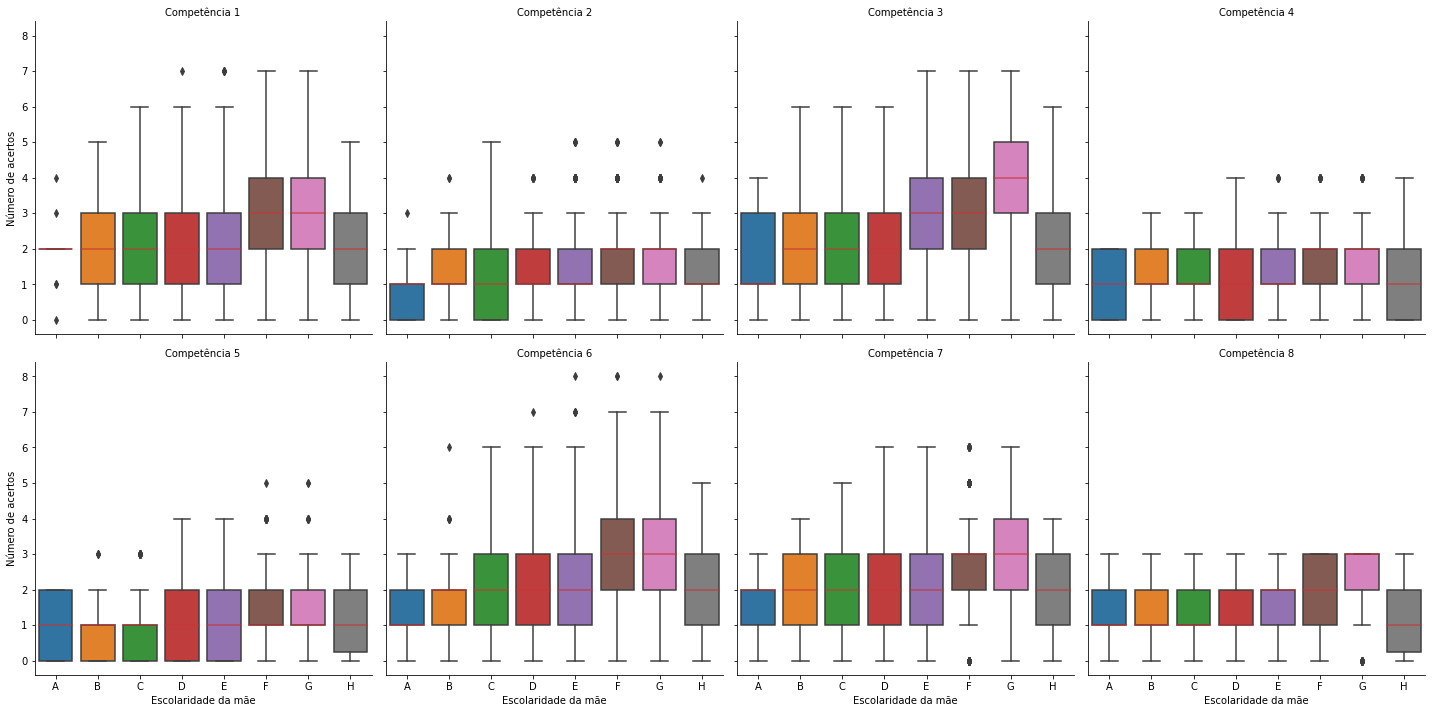

In [57]:
g = sns.catplot(data=melted, y='n_acertos', x='Q002', col='competencia', kind='box', col_wrap=4, medianprops=dict(color="#c73434", alpha=0.7))
g.set_ylabels("Número de acertos")
g.set_xlabels('Escolaridade da mãe')
g.set_titles(col_template= 'Competência {col_name[2]}')

Até que série sua mãe, ou a mulher responsável por você, estudou?

>A - Nunca estudou.
>
>B - Não completou a 4ª série/5º ano do Ensino Fundamental.
>
>C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
>
>D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
>
>E - Completou o Ensino Médio, mas não completou a Faculdade.
>
>F - Completou a Faculdade, mas não completou a Pós-graduação.
>
>G - Completou a Pós-graduação.
>
>H - Não sei.


#### Fazendo codificação ordinal da variável 'escolaridade da mãe'
As categorias A-G serão codificadas em números de 1 a 7, respeitando a relação ordinal entre as categorias. A categoria H não entrará na análise por não ter uma relação ordinal clara com as outras 

In [58]:
melted = dados[['Q006','TP_DEPENDENCIA_ADM_ESC','Q002', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8']].melt(id_vars=["Q006","TP_DEPENDENCIA_ADM_ESC","Q002"], var_name="competencia", value_name='n_acertos')
melted = melted.sort_values(by=['Q002', 'competencia'])

In [59]:
melted['Q002'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [60]:
melted.shape[0]

24760

In [61]:
#Excluindo alunos que não sabem a escolaridade da mãe
melted = melted[melted['Q002'] != 'H']

In [62]:
melted['Q002'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [63]:
melted.shape[0]

24360

In [64]:
traducao = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

In [65]:
melted['Q002'] = melted['Q002'].map(traducao)

In [66]:
melted['Q002']

322      1
575      1
662      1
1041     1
1300     1
        ..
24677    7
24679    7
24686    7
24737    7
24747    7
Name: Q002, Length: 24360, dtype: int64

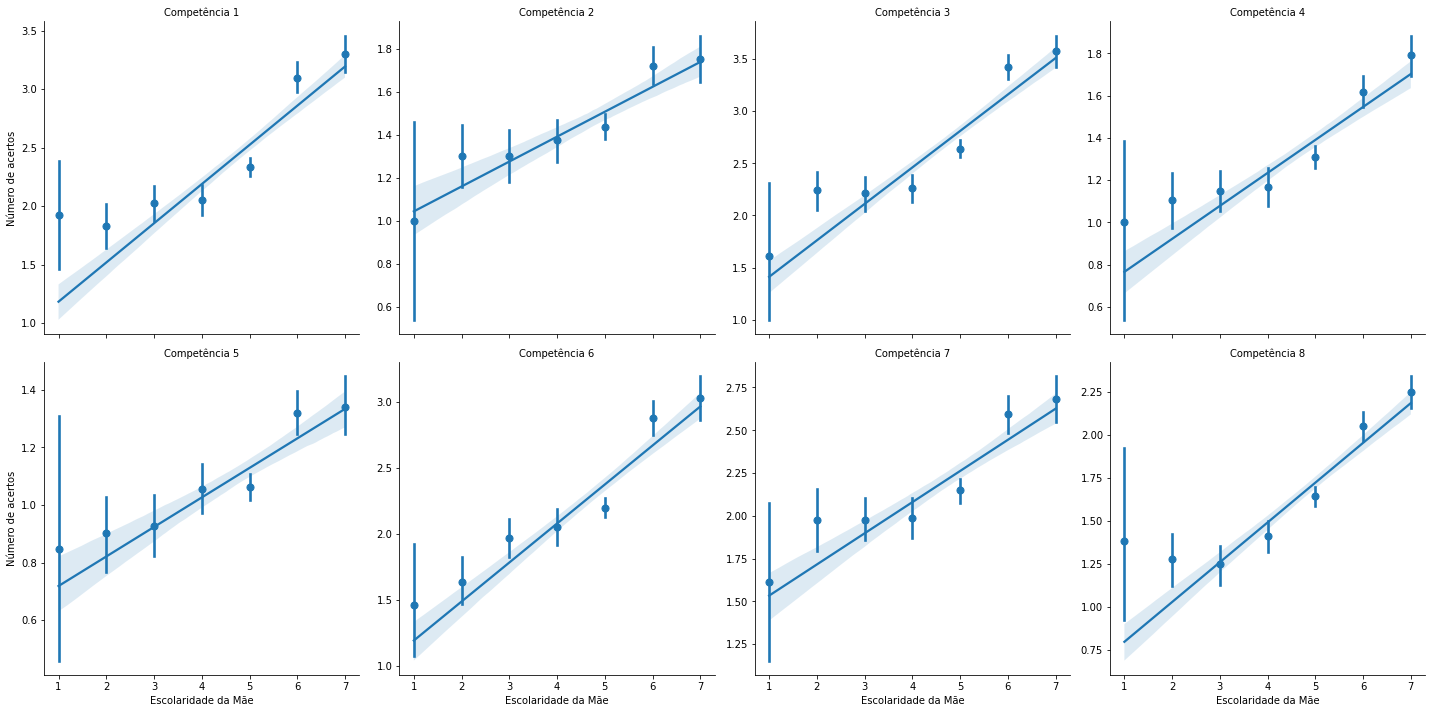

In [67]:
g = sns.lmplot(data=melted, y='n_acertos', x='Q002', col='competencia', col_wrap=4, x_estimator=np.mean, facet_kws= {'sharey' :False})
g.set_ylabels("Número de acertos")
g.set_xlabels('Escolaridade da Mãe')
g.set_titles(col_template= 'Competência {col_name[2]}')

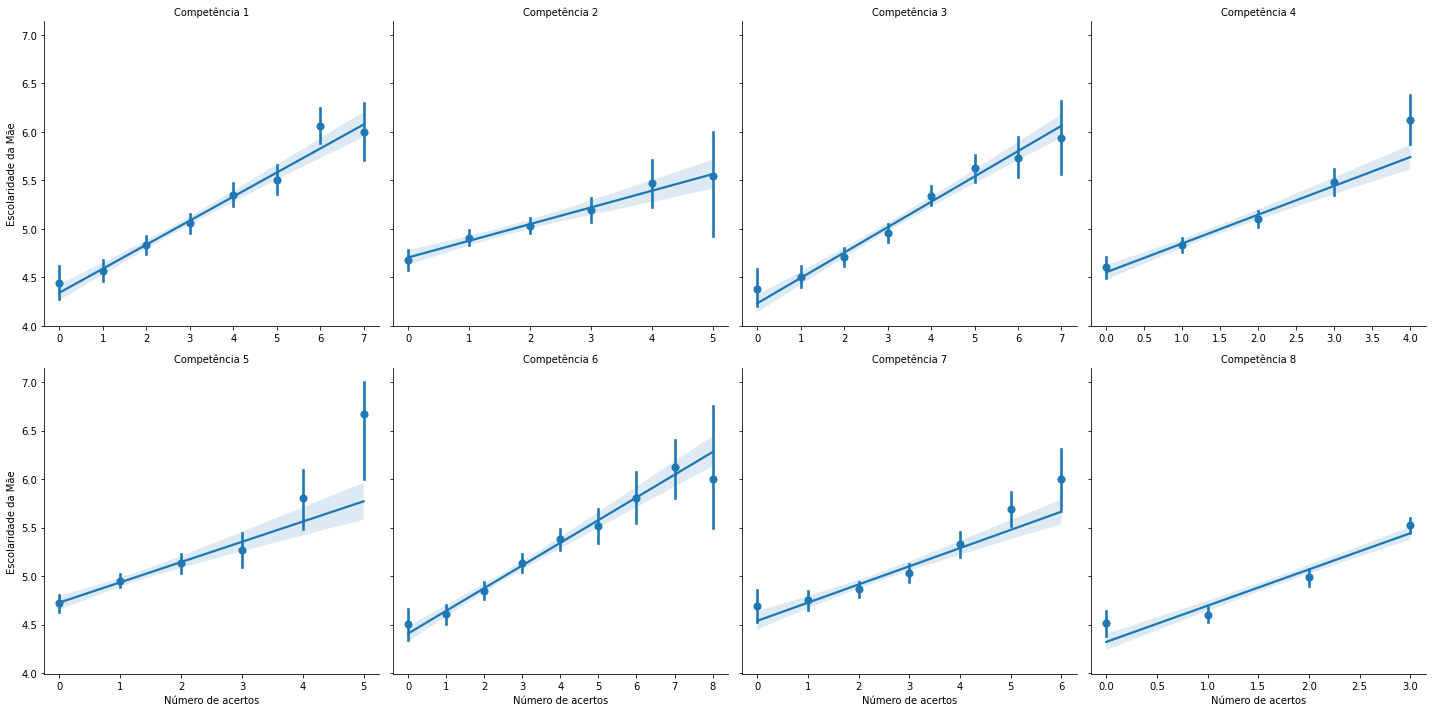

In [68]:
g = sns.lmplot(data=melted, x='n_acertos', y='Q002', col='competencia', col_wrap=4, x_estimator=np.mean, facet_kws= {'sharex' :False})
g.set_xlabels("Número de acertos")
g.set_ylabels('Escolaridade da Mãe')
g.set_titles(col_template= 'Competência {col_name[2]}')